## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv('german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
data.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Пропусков прям пропусков тут нет

In [4]:
cat = ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'personal_status_sex',
      'other_debtors', 'property', 'other_installment_plans', 'job', 'housing']
quant = ['duration', 'amount', 'age']
binary = ['telephone', 'foreign_worker', 'credit_risk']
ordinal = ['installment_rate', 'present_residence', 'number_credits', 'people_liable']


### Чуть-чуть поясню: 
Столбец `status` содержит значение `no checking account` и другие значения, которые можно назвать порядковыми. Хотя можно сказать, что `no checking account` по сути является пропуском для порядкового признака, но такое значение явно несет какой-то смысл, это не просто недостаток данных, поэтому является категориальным признаком, аналогично признаки: `savings`, `employment_duration`

Аналогично признак `other_debtors` можно назвать бинарным с пропущенным значением `none` что по сути и есть пропущенное значение, но это значение свидетельствует об отсутсвии других видов задолжности, а не о неполной инфорации в данных, поэтому является категориальным признаком, аналогично признак `other_installment_plans`

Признак `people_liable` имеет всего два значения, поэтому по сути можно определить его как бинарный признак, но значения 0-2 и 3+ все-таки имеют порядок, так что этот признак считаю порядковым, но приводимым к бинарному без добавления новых столбцов

Остальные столбцы в целом, недеюсь, не требуют пояснений

Ну и я думаю не нужно было оставлять тут 21 параграф с `data['column'].value_counts()`, чтобы мне поверили, что я так делал)

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [5]:
data.groupby('purpose')['amount'].mean().sort_values()

purpose
vacation               1205.888889
radio/television       1498.000000
furniture/equipment    2487.685714
domestic appliances    2728.090909
others                 3062.948718
car (used)             3066.983425
repairs                3180.400000
retraining             4158.041237
car (new)              5370.223301
business               8209.333333
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [6]:
print('Процент клиентов моложе 30 лет, которые снимают жилье:',
      str(round((data[data.age < 30]['housing'] == 'rent').mean()*100, 2)) + '%')
print('Процент клиентов старше 40 лет, которые снимают жилье:',
      str(round((data[data.age > 40]['housing'] == 'rent').mean()*100, 2)) + '%')

Процент клиентов моложе 30 лет, которые снимают жилье: 66.67%
Процент клиентов старше 40 лет, которые снимают жилье: 68.01%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [7]:
print('Количество иностранцев, число кредитов у которых больше 3:',
      data[(data.foreign_worker == 'yes') & ((data.number_credits == '4-5') | (data.number_credits == '>= 6'))
          ].shape[0])

Количество иностранцев, число кредитов у которых больше 3: 1


### Задание 6 (1 балл)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

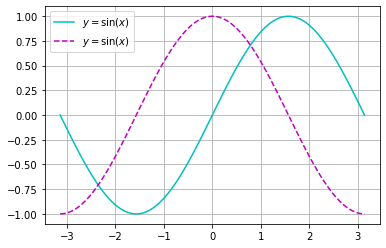

In [9]:
linspace = np.linspace(-np.pi, np.pi, 100)
plt.plot(linspace, np.sin(linspace), label = r'$y = \sin(x)$', color='c')
plt.plot(linspace, np.cos(linspace), '--', label = r'$y = \sin(x)$', color='m')
plt.grid(True)
plt.legend()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

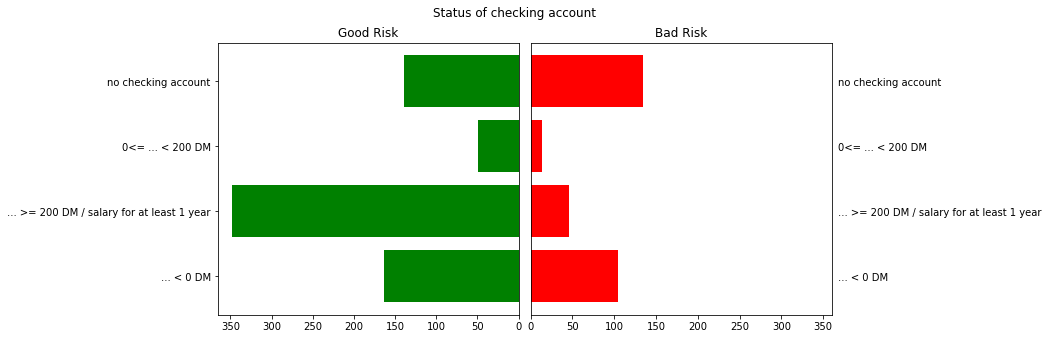

In [10]:
fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2, sharey='col')
fig.suptitle('Status of checking account')
fig.set_size_inches(11, 5)
good = data[data.credit_risk == 'good'].status.value_counts().sort_index()
bad = data[data.credit_risk == 'bad'].status.value_counts().sort_index()
ax1.barh(y = good.index, width = good, color='g')
ax1.set_title('Good Risk')
ax1.invert_xaxis()
ax2.barh(y = good.index, width = bad, color='r')
ax2.set_title('Bad Risk')
ax2.set_xbound(0, 360)
ax2.tick_params('y', labelright=True, labelleft=False, left = False)
plt.subplots_adjust(wspace=0.04)

### Задание 8  (0.5 балла)

In [12]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

In [1]:
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.countplot(data = data, x = 'savings', hue='credit_risk')
ax.set_title('Кредитный риск в зависимости от сбережений');

NameError: name 'sns' is not defined

#### С точки зрения трудоемкости очев sns, учитывая что полгода читал документацию к matplotlib, с точки зрения восприятия на простых графиках в целом тоже sns, но делать сложные графики с нормальным восприятием наверное будет лучше на matplotlib

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

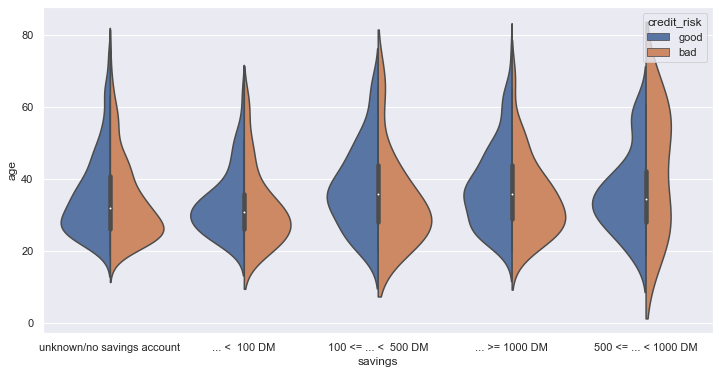

In [24]:
sns.violinplot(data = data, x = 'savings', y='age', hue='credit_risk', split=True);

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

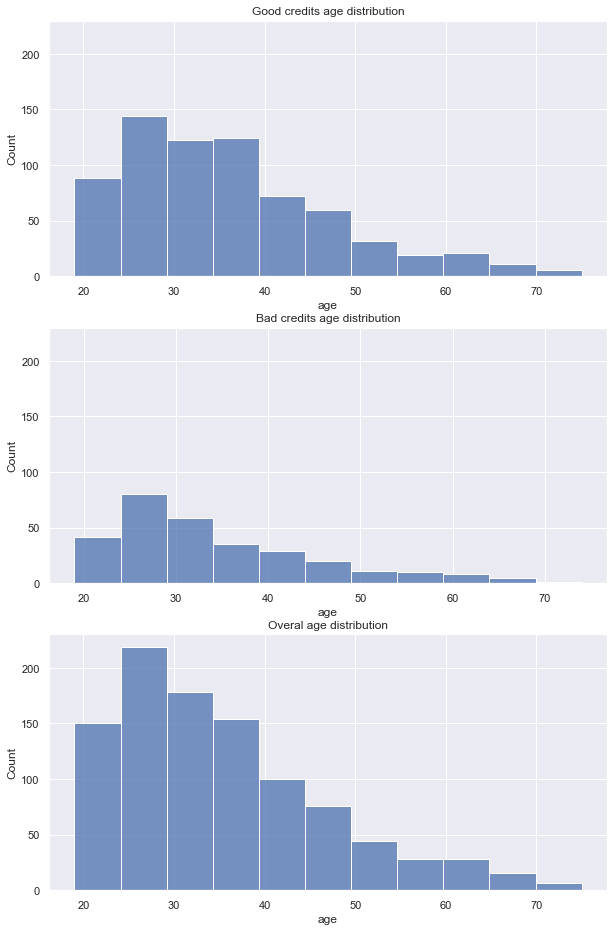

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(10, 16), sharey=True)
sns.histplot(ax=axes[0], data = data[data['credit_risk'] == 'good'],
             x='age', bins=11).set_title('Good credits age distribution')
sns.histplot(ax=axes[1], data = data[data['credit_risk'] == 'bad'],
             x='age', bins=11).set_title('Bad credits age distribution')
sns.histplot(ax=axes[2], data = data, x='age', bins=11).set_title('Overal age distribution');

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

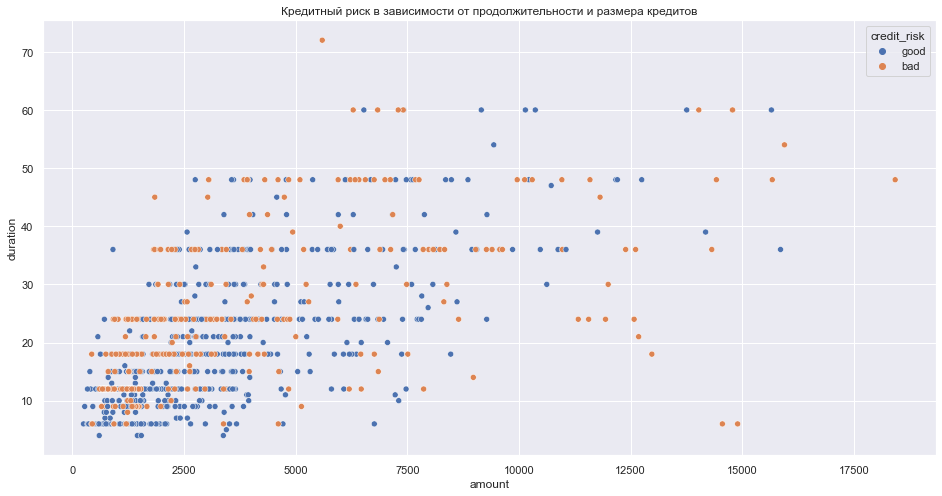

In [29]:
f, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(x="amount", y="duration", hue="credit_risk", data=data, ax=ax)
ax.set_title('Кредитный риск в зависимости от продолжительности и размера кредитов');

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

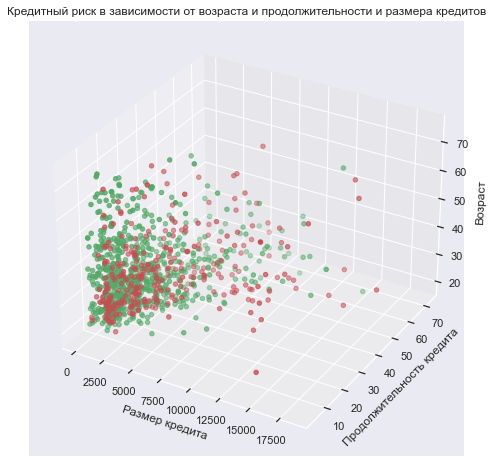

In [36]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(projection='3d')
g = data[data.credit_risk == 'good']
b = data[data.credit_risk == 'bad']
ax.scatter(b.amount, b.duration, b.age, color='r')
ax.scatter(g.amount, g.duration, g.age, color='g')
ax.set_title('Кредитный риск в зависимости от возраста и продолжительности и размера кредитов');
ax.set_ylabel('Продолжительность кредита')
ax.set_xlabel('Размер кредита')
ax.set_zlabel('Возраст');

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [37]:
data = pd.get_dummies(data, columns=cat, drop_first=True)
binary_map = {'yes':1, 'no':0, 'yes (under customer name)':1, 'good':1, 'bad':0}
for i in binary:
    data[i] = data[i].map(binary_map)
ordinal_map = {'1':0, '2-3':1, '4-5':2, '>= 6':3, '0 to 2':0, '3 or more':1, '< 20':0,
              '20 <= ... < 25':1, '25 <= ... < 35':2, '>= 35':3, '< 1 yr':0, '1 <= ... < 4 yrs':1, 
              '4 <= ... < 7 yrs':2, '>= 7 yrs':3}
for i in ordinal:
    data[i] = data[i].map(ordinal_map)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

/var/folders/dz/tsxwjxwn79z6r1twnqkks5_c0000gn/T/ipykernel_3137/2136242589.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


#### Шутка про `return 1` (accuracy = 0.66)

### Что хочется сделать идейно: 
Берем все признаки, где 2 значения и считаем средний процент с `"credit_risk" = "good"` для максимального и минимального значения, смотрим при каком из значений процент `good` больше и накидываем штраф / поощрение в размере разницы между процентами умноженными на значение. Затем путем перебора значения, после которого считаем, что `"credit_risk" = "good"`, выбираем результат с лучшим попаданием и можем использовать на тестовой выборке, если результат в целом устроит)

In [39]:
d = pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))))

In [40]:
p = np.zeros_like(y_train)
for i in d.columns[:-1]:
    m = d.groupby(i)[d.columns[-1]].mean()
    if m.size == 2:
        p = p + (d[i])*(m[1] - m[0])

In [41]:
results = []
for i in np.arange(p.min(), p.max(), 0.01):
    t = 0
    more = d[p >= i][48]
    less = d[p < i][48]
    if 0 in more.values:
        t += more.value_counts()[0]
    if 1 in less.values:
        t += less.value_counts()[1]
    results.append((t, i))
sorted(results)[0]

(179, -0.1629587285869578)

### На этом моменте берем -0.16 и считаем accuracy для теста)

In [42]:
def get_scores():
    scores = []
    for i in d.columns[:-1]:
        m = d.groupby(i)[d.columns[-1]].mean()
        if m.size == 2:
            scores.append(m[1] - m[0])
        else:
            scores.append(0)
    return np.array(scores)

In [43]:
def predict(Xtest: np.array) -> np.array:
    res = (Xtest * get_scores()).sum(axis = 1)
    return np.where(res > -0.16, 1, 0)


accuracy_score(y_test, predict(X_test))

0.72

### Допустим это неплохо)